In [7]:
import numpy as np
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import HDBSCAN

In [8]:
def gaussian(x, mu, sigma):
    return torch.exp(-((x - mu)/sigma)**2/2)

In [9]:
T = 10000

In [13]:
tt = torch.arange(121)

template = torch.zeros(121)
template += gaussian(tt, 35, 3)
template -= 3 * gaussian(tt, 42, 5)
template += gaussian(tt, 50, 10)
template *= 5


template2 = torch.zeros(121)
template2 += 2 * gaussian(tt, 35, 3)
template2 -= 2 * gaussian(tt, 42, 5)
template2 += gaussian(tt, 50, 20)
template2 *= 3

plt.plot(template.detach().cpu().numpy())
plt.plot(template2.detach().cpu().numpy())

RuntimeError: Numpy is not available

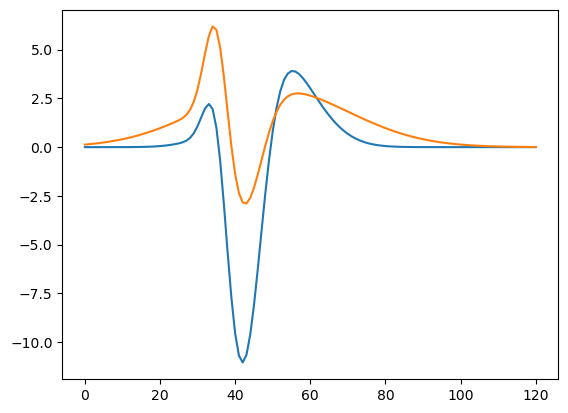

In [14]:
tt = np.arange(121)
gaussian = lambda x, mu, sigma: np.exp(-(x - mu)**2 / (2 * sigma**2))

template = 5 * (gaussian(tt, 35, 3) - 3 * gaussian(tt, 42, 5) + gaussian(tt, 50, 10))
template2 = 3 * (2 * gaussian(tt, 35, 3) - 2 * gaussian(tt, 42, 5) + gaussian(tt, 50, 20))

plt.plot(template)
plt.plot(template2)
plt.show()

In [ ]:
noise = torch.randn(T)

isis = torch.randint(low=60, high=200, size=(100,)) # the inter spike intervals
times = torch.cumsum(isis, dim=0)
times = times[times < T - 200]


times2 = torch.cumsum(torch.randint(low=60, high=200, size=(100,)), dim=0)
times2 = times2[times2 < T - 200]

times

tensor([  84,  152,  297,  455,  649,  820,  896, 1043, 1229, 1391, 1530, 1644,
        1755, 1869, 2049, 2218, 2370, 2527, 2709, 2775, 2947, 3038, 3160, 3233,
        3388, 3579, 3702, 3843, 3942, 4134, 4330, 4425, 4525, 4648, 4751, 4811,
        4926, 4998, 5160, 5349, 5437, 5559, 5651, 5800, 5984, 6108, 6197, 6309,
        6405, 6487, 6582, 6647, 6816, 6960, 7134, 7225, 7295, 7405, 7517, 7607,
        7767, 7877, 7960, 8050, 8129, 8194, 8275, 8377, 8530, 8725, 8888, 8964,
        9116, 9282, 9455, 9582, 9680])

In [36]:
isis

tensor([104, 198, 131,  84, 105, 173, 115,  60, 188,  85, 136,  63,  73,  68,
        174, 125, 105, 189, 119, 166,  68, 171, 110, 138,  85, 164, 137, 142,
        170, 175, 175, 183, 145, 198, 123, 154,  95, 114, 130, 160, 109,  77,
         85, 137, 127,  78, 172,  83,  85,  70, 136, 146, 128, 185, 125,  90,
        177, 174, 104, 165, 121,  86, 115, 194, 189, 169,  96,  76, 112,  79,
        198, 164, 115, 169, 124, 188, 166, 119, 187,  96, 123,  75, 111,  84,
        129,  79, 192,  98, 136, 111, 193, 150, 167, 115, 186, 130,  89, 181,
        142,  76])

In [37]:
times

tensor([ 104,  302,  433,  517,  622,  795,  910,  970, 1158, 1243, 1379, 1442,
        1515, 1583, 1757, 1882, 1987, 2176, 2295, 2461, 2529, 2700, 2810, 2948,
        3033, 3197, 3334, 3476, 3646, 3821, 3996, 4179, 4324, 4522, 4645, 4799,
        4894, 5008, 5138, 5298, 5407, 5484, 5569, 5706, 5833, 5911, 6083, 6166,
        6251, 6321, 6457, 6603, 6731, 6916, 7041, 7131, 7308, 7482, 7586, 7751,
        7872, 7958, 8073, 8267, 8456, 8625, 8721, 8797, 8909, 8988, 9186, 9350,
        9465, 9634, 9758])

In [38]:
data = noise.clone()
data_original = data.clone()

for t in times:
    data[t-42:t+len(template)-42] += template

for t in times2:
    data[t-42:t+len(template)-42] += template2

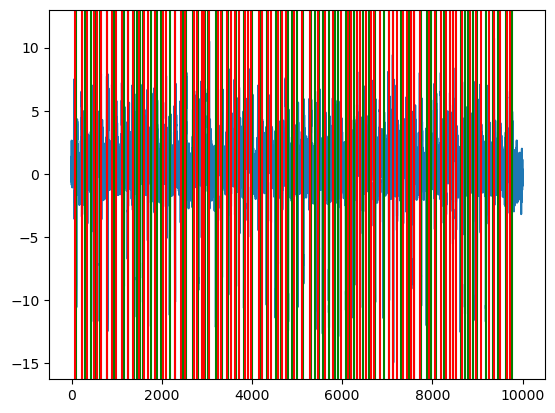

In [39]:
plt.plot(data)
for t in times:
    plt.axvline(t, c='g')
for t in times2:
    plt.axvline(t, c='r')

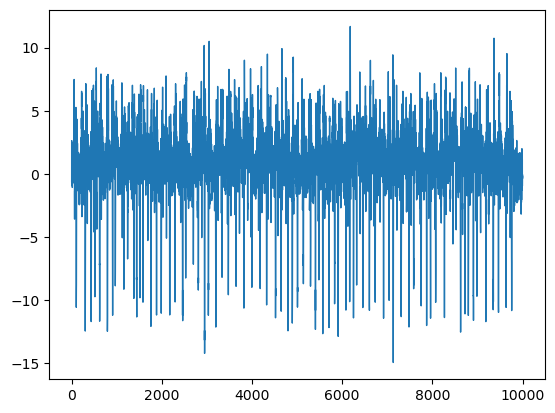

In [40]:
plt.plot(data, lw=1)

In [41]:
from scipy.signal import find_peaks

In [42]:
peaks, info = find_peaks(-data.numpy(), height=3, prominence=1)

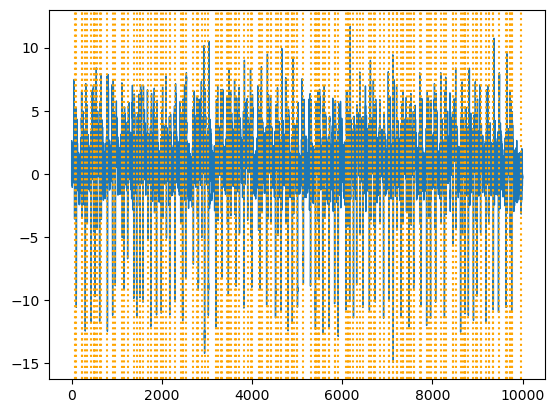

In [43]:
plt.plot(data, lw=1)
for p in peaks:
    plt.axvline(p, c='orange', ls=':')

In [45]:
peaks = peaks[peaks > 100]
peaks = peaks[peaks < T - 200]

In [46]:
snippets = []
for p in peaks:
    snippets.append(data[p - 42: p - 42 + 121])
snippets = np.array(snippets)

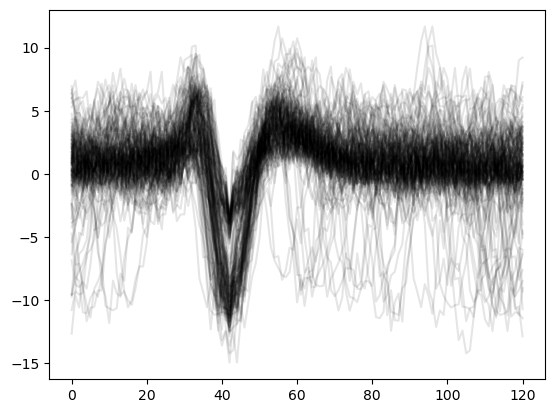

In [48]:
plt.plot(snippets.T, c='k', alpha=0.1);

In [49]:
pca = PCA(2)
features = pca.fit_transform(snippets)

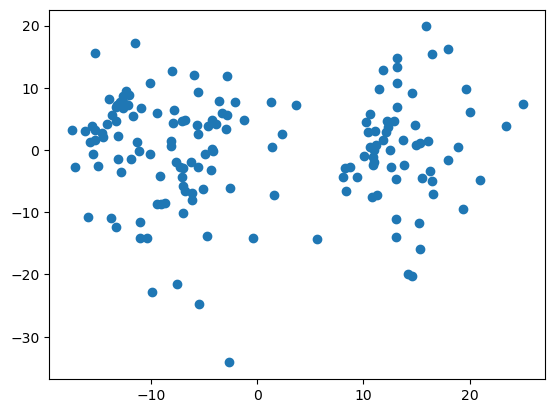

In [50]:
plt.scatter(*features.T)

In [52]:
clus = HDBSCAN(min_cluster_size=25)
labels = clus.fit_predict(features)

In [53]:
labels

array([ 0, -1, -1,  0,  1,  0, -1, -1, -1,  1,  0, -1,  0,  0,  0,  1,  0,
       -1,  0, -1,  0,  0,  0, -1,  0, -1,  0,  0, -1, -1,  0, -1,  0, -1,
        0, -1,  0, -1,  1,  0,  1,  0,  0,  0,  1, -1,  0,  1,  0,  0,  1,
        1,  0,  1,  0,  1,  1,  0,  1,  0,  1,  0,  1,  1,  1,  0, -1,  0,
       -1, -1,  0,  0,  0, -1,  1,  0,  0,  0,  0,  0,  0, -1, -1,  0, -1,
        0,  1,  0,  0,  0,  0,  0, -1, -1, -1,  0,  0,  0,  1,  0,  0,  1,
        1,  0,  1,  0,  0,  0, -1,  0,  1,  1,  1,  0, -1,  1, -1,  0,  1,
       -1, -1, -1,  0,  0, -1,  0, -1,  0, -1,  0, -1,  0, -1,  1,  0,  1,
        0, -1, -1,  0, -1, -1,  0,  1,  1,  0,  1,  1,  0, -1, -1,  0,  1,
       -1, -1,  0, -1])

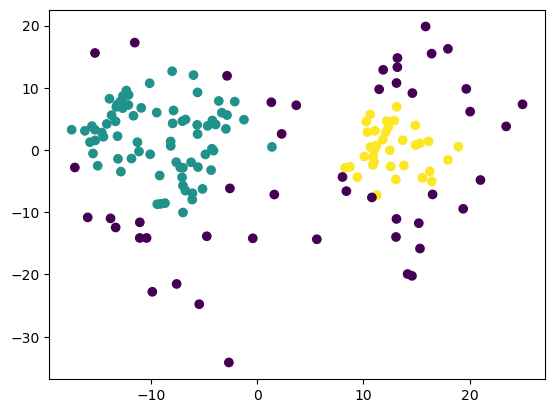

In [54]:
plt.scatter(*features.T, c=labels)

In [56]:
template1_sample = snippets[labels == 0].mean(0)
template2_sample = snippets[labels == 1].mean(0)

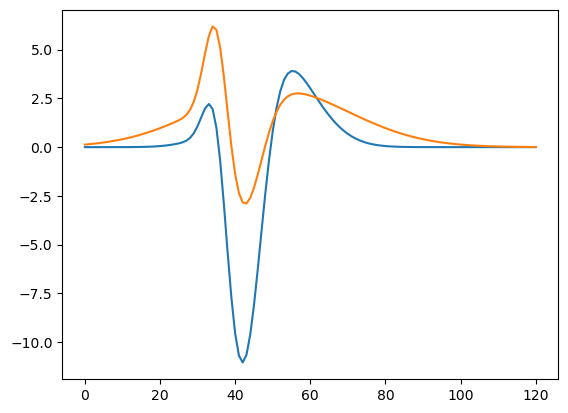

In [58]:
plt.plot(template)
plt.plot(template2)

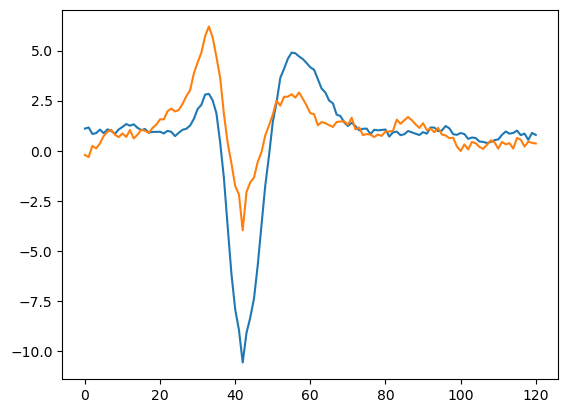

In [57]:
plt.plot(template1_sample)
plt.plot(template2_sample)

In [52]:
# x_i = mu + noise_i
noise = torch.randn(121, 100)
x = template[:, None] + noise

In [53]:
x

tensor([[-0.6926, -0.0120,  0.4679,  ..., -1.4339,  1.9327,  1.6840],
        [-0.6256,  1.6463,  0.0955,  ..., -1.5362,  1.0213,  0.9407],
        [-0.0309,  0.6779, -0.2760,  ..., -1.1115,  0.1657,  0.4790],
        ...,
        [ 0.2835, -0.8791,  2.4144,  ..., -0.2047, -1.4336,  1.7734],
        [-0.1642,  1.3315, -0.9713,  ..., -0.6835,  1.6086, -0.7452],
        [ 0.8316,  1.0094, -0.3819,  ..., -1.6951, -0.2789, -1.1354]])

In [49]:
noise.shape

torch.Size([100, 121])

In [50]:
template.shape

torch.Size([121])

In [39]:
data.shape

torch.Size([1000])

In [41]:
data[None, None].shape

torch.Size([1, 1, 1000])

In [42]:
# Mij = i * j, 10x10 matrix
torch.arange(10)[:, None] * torch.arange(10)[None, :]

tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
        [ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18],
        [ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27],
        [ 0,  4,  8, 12, 16, 20, 24, 28, 32, 36],
        [ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45],
        [ 0,  6, 12, 18, 24, 30, 36, 42, 48, 54],
        [ 0,  7, 14, 21, 28, 35, 42, 49, 56, 63],
        [ 0,  8, 16, 24, 32, 40, 48, 56, 64, 72],
        [ 0,  9, 18, 27, 36, 45, 54, 63, 72, 81]])

In [44]:
torch.arange(10).shape

torch.Size([10])

In [43]:
torch.arange(10)[:, None].shape

torch.Size([10, 1])

In [45]:
torch.arange(10)[None, :].shape

torch.Size([1, 10])

In [76]:
xc1 = F.conv1d(data[None, None], template[None, None])
xc2 = F.conv1d(data[None, None], template2[None, None])

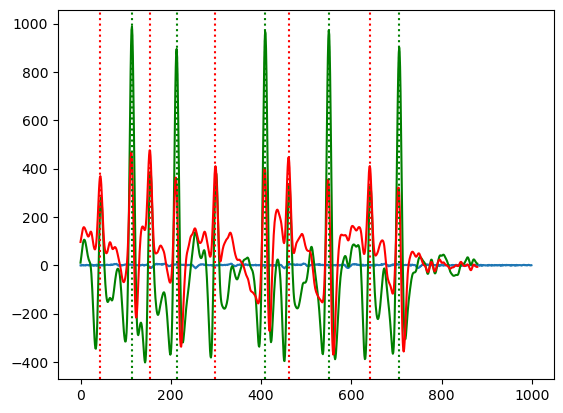

In [78]:
plt.plot(data)

plt.plot(xc1.reshape(-1), c='g')
plt.plot(xc2.reshape(-1), c='r')

for t in times:
    plt.axvline(t-42, c='g', ls=":")
for t in times2:
    plt.axvline(t-42, c='r', ls=":")

In [83]:
xc1.argmax()

tensor(114)

In [84]:
data[xc1.argmax():xc1.argmax()+121] -= template

In [85]:
xc1 = F.conv1d(data[None, None], template[None, None])
xc2 = F.conv1d(data[None, None], template2[None, None])

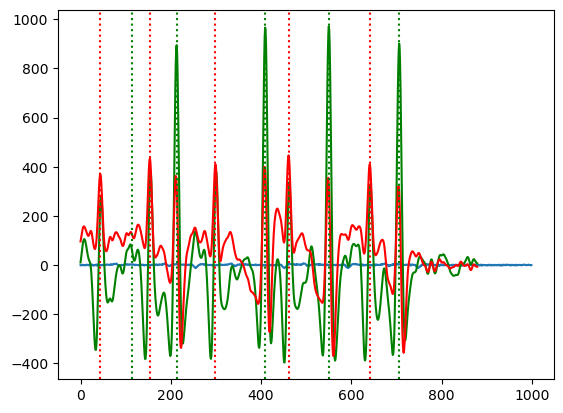

In [86]:
plt.plot(data)

plt.plot(xc1.reshape(-1), c='g')
plt.plot(xc2.reshape(-1), c='r')

for t in times:
    plt.axvline(t-42, c='g', ls=":")
for t in times2:
    plt.axvline(t-42, c='r', ls=":")

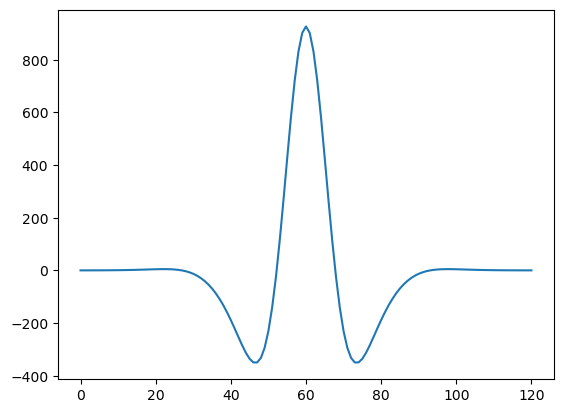

In [79]:
plt.plot(F.conv1d(template[None, None], template[None, None], padding=121//2)[0,0])

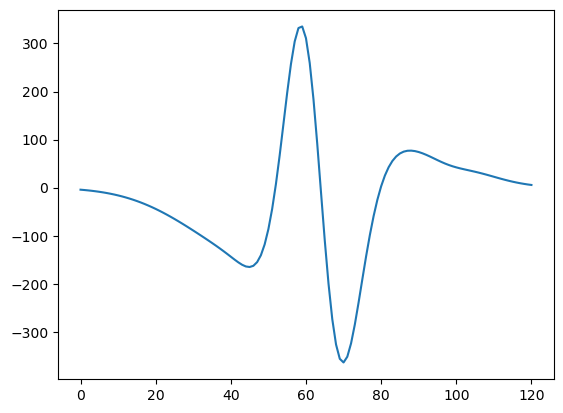

In [82]:
plt.plot(F.conv1d(template[None, None], template2[None, None], padding=121//2)[0,0])

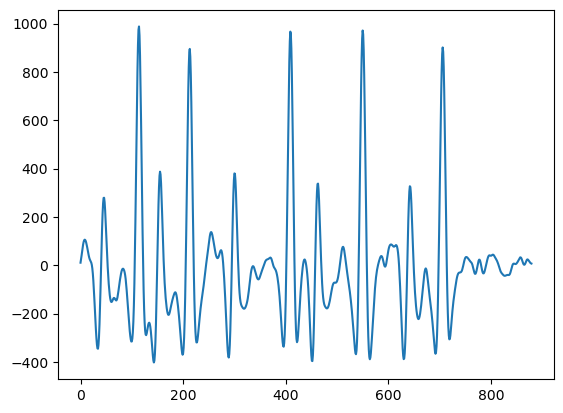

In [81]:
plt.plot(xc1.reshape(-1))